In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 

import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv("X.txt", delimiter=" ", header=None)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.980177,0.628058,0.288046,-1.671945,-0.085840,-0.163211,0.108807,-0.435453,0.147730,-0.285670,...,2.088449,-1.014255,-0.423560,-0.870608,-0.921233,-1.447748,0.554352,-0.967488,1.694810,1.099867
1,-1.722960,-1.723460,-1.305635,0.706715,-1.542858,-2.186801,-0.742675,-0.319861,-1.350508,0.926180,...,-0.439705,-0.197959,0.314291,-2.054907,0.072413,-1.934991,0.935861,0.750241,-0.191711,-1.499949
2,1.172566,-0.235771,-0.385216,0.084084,-2.207806,-0.066960,0.500649,-0.156459,-0.350201,-1.449118,...,-1.243935,0.869907,-1.293595,-0.406142,-0.754354,-0.442438,0.600910,-1.034253,-1.905852,0.956277
3,0.490787,0.993502,0.248395,1.045396,1.532511,1.634100,-0.005681,-0.084379,0.662641,0.474945,...,1.488665,-1.743821,-1.236939,0.117837,0.295043,-1.336598,-0.406536,-0.187841,-0.229590,-0.250259
4,-1.277386,-0.307068,-0.450868,-0.598372,-0.915832,-1.907487,-1.674766,-0.498261,-1.076544,-0.391446,...,-2.332443,-1.012189,-1.621601,-0.592864,-1.912750,0.160692,-0.386495,-1.646662,-2.829093,-2.327198


In [5]:
X.shape

(50, 300)

In [6]:
y = pd.read_csv("y.txt", delimiter=" ", header=None)

In [7]:
y.head()

,0
0,-0.759361
1,-2.101183
2,-0.896895
3,1.374790
4,-0.711535


In [34]:
N=100
lambdas = np.geomspace(0.001, 2, N)

In [35]:
# alphas = 10**np.linspace(10,-2,100)*0.5
# alphas.shape

In [36]:
#model = Lasso()

In [37]:
#model.fit(X, y)

In [38]:
#model.coef_.shape

In [39]:
coefs = []
for a in lambdas:
    lasso =  Lasso(alpha=a, normalize = False, fit_intercept=False)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
#ax = plt.gca()
#plt.semilogx(lambdas, coefs)
# ax.plot(alphas*2, coefs)
# ax.set_xscale('log')
#plt.axis('tight')
#plt.xlabel(r'$\lambda$')
#plt.ylabel('coefficients')

No handles with labels found to put in legend.


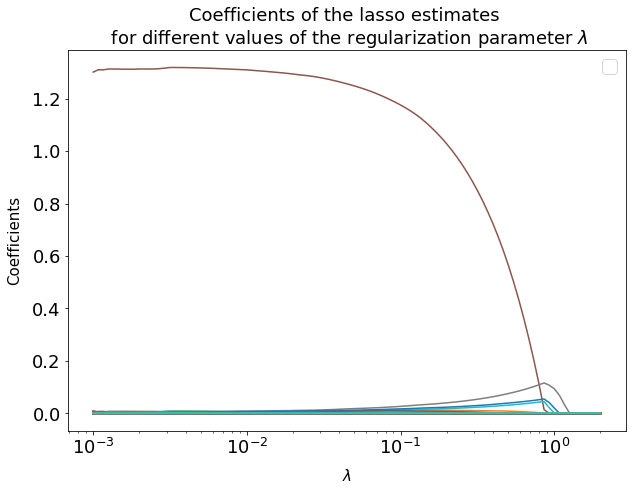

In [40]:
plt.figure(figsize=(10, 7))
plt.semilogx(lambdas, coefs)
#plt.semilogx(lambdas[1], coefs[1], label = "lambda 1")
plt.title(f"Coefficients of the lasso estimates \n for different values of the regularization parameter $\lambda$", fontsize=18)
plt.ylabel("Coefficients", fontsize=15, labelpad=10)
plt.xlabel(r"$\lambda$", fontsize=15, labelpad=10)
#plt.legend(lambdas, ['0.001','2'])
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axis('tight')
plt.savefig("lasso.pdf", bbox_inches='tight')
plt.show()
plt.close()

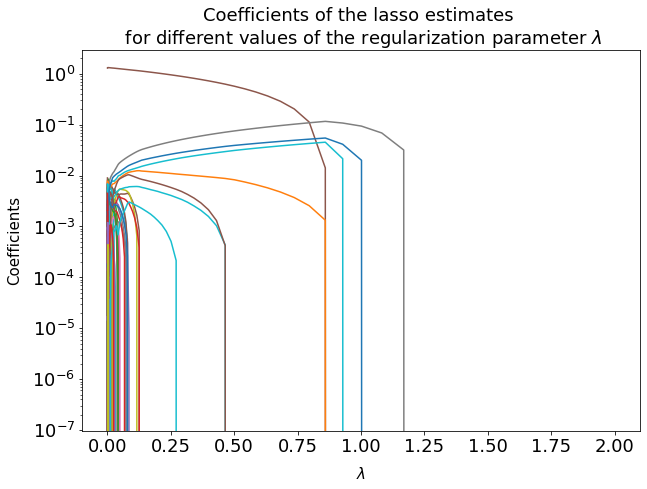

In [18]:
plt.figure(figsize=(10, 7))
plt.semilogy(lambdas, coefs)
plt.title(f"Coefficients of the lasso estimates \n for different values of the regularization parameter $\lambda$", fontsize=18)
plt.ylabel("Coefficients", fontsize=15, labelpad=10)
plt.xlabel(r"$\lambda$", fontsize=15, labelpad=10)
#plt.legend([arr1, arr2, arr3], ['u','v','u+v'])
#plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axis('tight')
plt.savefig("lasso.pdf", bbox_inches='tight')
plt.show()
plt.close()

In [41]:
from sklearn.linear_model import lasso_path

from itertools import cycle

In [93]:
alphas, coef_path, _ = lasso_path(X, y, alphas=lambdas)

In [103]:
alphas.shape

(100,)

In [104]:
coef_path.shape

(300, 100)

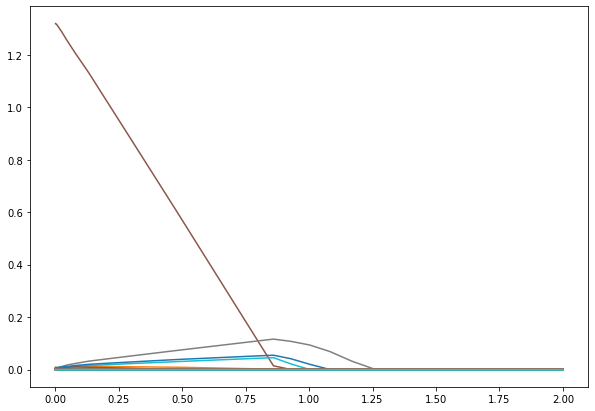

In [107]:
plt.figure(figsize=(10, 7))
#plt.semilogx(alphas, coef_path.T);
plt.plot(alphas, coef_path.T); # Set log scale  ...: